# DATA 200 | Group Assignment On Data Exploration

Working on sensor dataset

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('bmh')
pd.set_option('display.max_columns', 200)

### Loading the dataset

In [7]:
# load each csv files
csv_files = ["part1.csv", "part2.csv", "part3.csv", "part4.csv", "part5.csv"]

# combine the csv files into a single dataframe
dataframes = [pd.read_csv(file) for file in csv_files]
df = pd.concat(dataframes, ignore_index = True)


### Understanding the dataset

#### Step 1: Basic Information

In [8]:
# Shape of the dataset
df.shape

(999999, 13)

In [9]:
# Since the dataset has 13 columns, let's display the name of columns
df.columns

Index(['factory_id', 'tag_type_code', 'battery_replace_date', 'display_name',
       'wdt_state_id', 'sensor_value', 'voltage', 'battery_capacity',
       'base_capacity', 'wakeup_counter', 'firmware_version', 'read_date',
       'render_counter'],
      dtype='object')

In [10]:
print("\n*** Dataset Information ***\n")
print(df.info())
print("\n*** First 5 rows ***\n")
print(df.head())


*** Dataset Information ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   factory_id            999999 non-null  int64  
 1   tag_type_code         999999 non-null  int64  
 2   battery_replace_date  999999 non-null  object 
 3   display_name          999999 non-null  object 
 4   wdt_state_id          999999 non-null  int64  
 5   sensor_value          999999 non-null  int64  
 6   voltage               999999 non-null  float64
 7   battery_capacity      999999 non-null  float64
 8   base_capacity         999999 non-null  float64
 9   wakeup_counter        999999 non-null  int64  
 10  firmware_version      999999 non-null  int64  
 11  read_date             999999 non-null  object 
 12  render_counter        999999 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 99.2+ MB
None

*** First 

##### As evident from the output above, pandas has decided for the three columns viz battery_replace_date, display_name and read_date as object. But the column name suggest it to be a datetime datatype. So let's convert it to datetime datatype.

In [11]:
# There is issue with the fractional seconds (for example, the read_date has values like 12:01:49.823)
# so we will use regex to to ensure the format is consistent.
# Normalize the fractional seconds to a consistent format
df['read_date'] = df['read_date'].str.replace(r'\.\d+$', '', regex=True)
df['battery_replace_date'] = df['battery_replace_date'].str.replace(r'\.\d+$', '', regex=True)



In [12]:
# Once the two columns are in consistent format, we are ready to convert them into datetime format.

df['battery_replace_date'] = pd.to_datetime(df['battery_replace_date'])
df['read_date'] = pd.to_datetime(df['read_date'])

In [13]:
# Now we will check for the datatypes once again
df.dtypes

factory_id                       int64
tag_type_code                    int64
battery_replace_date    datetime64[ns]
display_name                    object
wdt_state_id                     int64
sensor_value                     int64
voltage                        float64
battery_capacity               float64
base_capacity                  float64
wakeup_counter                   int64
firmware_version                 int64
read_date               datetime64[ns]
render_counter                   int64
dtype: object

In [14]:
#  Let's look at the Statiscal Summary for all the numeric columns
df.describe()

,factory_id,tag_type_code,battery_replace_date,wdt_state_id,sensor_value,voltage,battery_capacity,base_capacity,wakeup_counter,firmware_version,read_date,render_counter
count,9.999990e+05,999999.0,999999,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,9.999990e+05,9.999990e+05,999999,9.999990e+05
mean,7.255882e+07,208.0,2018-03-31 12:43:29.292191488,2.510876,181.211208,2.966106,65.802486,65.802486,1.838457e+06,2.047854e+05,2019-09-12 15:11:52.733511168,3.506749e+05
min,1.966080e+05,208.0,2007-12-26 00:00:00,1.000000,64.000000,1.020400,0.000000,0.000000,7.000000e+00,0.000000e+00,2018-06-12 12:01:08,0.000000e+00
25%,7.255256e+07,208.0,2018-03-26 01:00:00,3.000000,181.000000,2.962600,52.400000,52.400000,6.932805e+05,2.600000e+01,2019-02-07 12:00:53,9.000000e+00
50%,7.255719e+07,208.0,2018-03-27 01:00:00,3.000000,182.000000,2.979200,67.500000,67.500000,1.353894e+06,2.600000e+01,2019-08-23 12:03:01,1.600000e+01
75%,7.261795e+07,208.0,2018-05-16 01:00:00,3.000000,183.000000,2.995800,80.600000,80.600000,2.133284e+06,2.600000e+01,2020-04-09 12:00:51,3.000000e+01
max,7.263848e+07,208.0,2135-05-16 01:00:00,3.000000,255.000000,4.191000,2474.600000,2474.600000,4.294967e+09,1.515871e+09,2021-02-04 12:09:04,4.294967e+09
std,1.890091e+05,0.0,NaN,0.859655,4.751103,0.078868,18.354133,18.354133,3.515101e+07,1.704827e+07,NaN,3.774996e+07


#### From above it is evident that the tag_type_code has only 1 value through out the columns. Let us confirm by getting the number of unique values in this row. We will also confirm about the 3rd column namely "display_name" that pandas identifiead as object.\

In [15]:
# Count of unique values
tag_type_code_count = df['tag_type_code'].nunique()
display_name_count = df['display_name'].nunique()

print(f"Number of unique tag_type_code values: {tag_type_code_count}")
print(f"Number of unique display_name values: {display_name_count}")

Number of unique tag_type_code values: 1
Number of unique display_name values: 1


#### So since these two columns won't contribute to analysis since they lack variablility let's drop them

In [16]:
# Drop columns with single unique values
columns_to_drop = ['tag_type_code', 'display_name']
df = df.drop(columns=columns_to_drop)

# Confirm removal
print("Updated columns:", df.columns)


Updated columns: Index(['factory_id', 'battery_replace_date', 'wdt_state_id', 'sensor_value',
       'voltage', 'battery_capacity', 'base_capacity', 'wakeup_counter',
       'firmware_version', 'read_date', 'render_counter'],
      dtype='object')


In [17]:
# Let's check for any missing value in the dataset
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 factory_id              0
battery_replace_date    0
wdt_state_id            0
sensor_value            0
voltage                 0
battery_capacity        0
base_capacity           0
wakeup_counter          0
firmware_version        0
read_date               0
render_counter          0
dtype: int64


In [18]:
# Check for any duplicate value
duplicates = df.duplicated()
print(f"\nNumber of Duplicate Rows: {duplicates.sum()}")


Number of Duplicate Rows: 0


In [19]:
df.isna().sum()

factory_id              0
battery_replace_date    0
wdt_state_id            0
sensor_value            0
voltage                 0
battery_capacity        0
base_capacity           0
wakeup_counter          0
firmware_version        0
read_date               0
render_counter          0
dtype: int64

### Step 2:

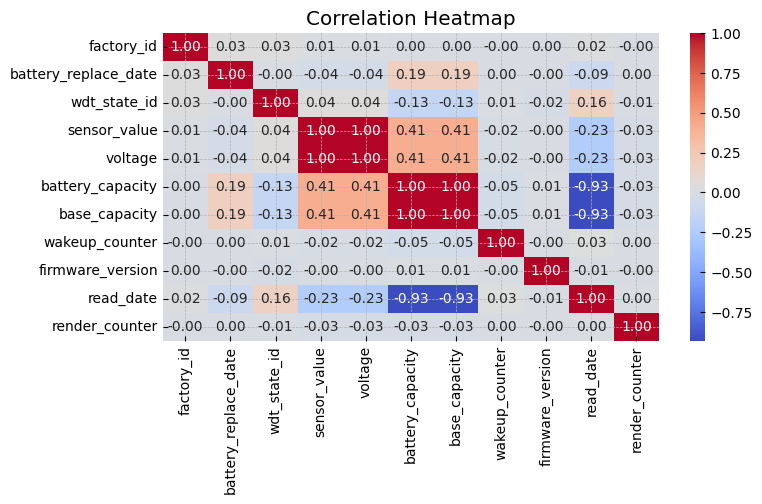

In [20]:
correlation_matrix = df.corr()
plt.figure(figsize= (8,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

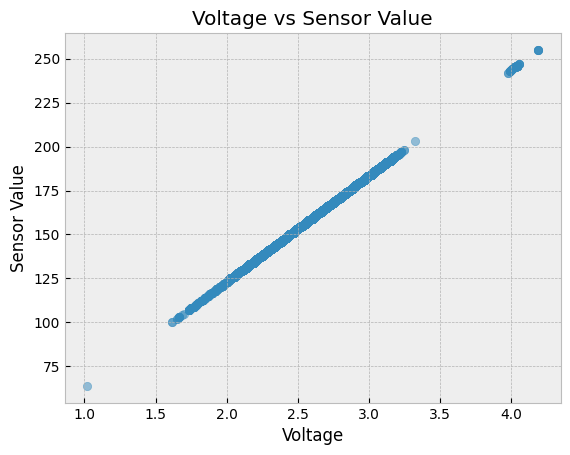

In [21]:
plt.scatter(df['voltage'], df['sensor_value'], alpha=0.5)
plt.title('Voltage vs Sensor Value')
plt.xlabel('Voltage')
plt.ylabel('Sensor Value')
plt.show()


# STEP 3

### Time Based Analysis

#### Let's use monthly data for analysis

In [1]:
# We will extract the month from the read_date feature 
df['read_date'] = pd.to_datetime(df['read_date'])
df['read_date_month'] = df['read_date'].dt.to_period('M')
read_date_month.head()

NameError: name 'pd' is not defined

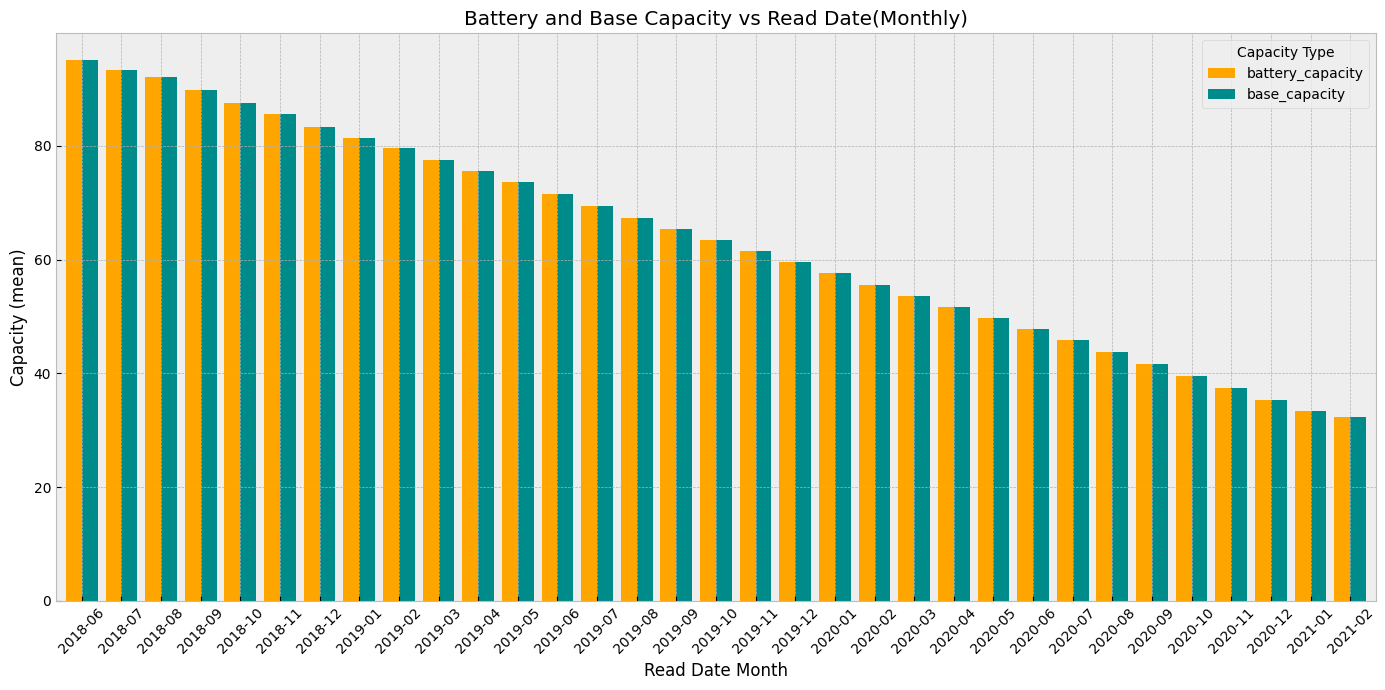

In [28]:
# Group by the year_month and calculate the mean for battery_capacity and base_capacity
monthly_capacity = df.groupby('read_date_month')[['battery_capacity', 'base_capacity']].mean()

# Plot the bar graph for both capacities
plt.figure(figsize=(14, 7))
monthly_capacity.plot(kind='bar', width=0.8, color=['orange', 'darkcyan'], ax=plt.gca())
plt.title('Battery and Base Capacity vs Read Date(Monthly)')
plt.xlabel('Read Date Month')
plt.ylabel('Capacity (mean)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Capacity Type")
plt.tight_layout()
plt.show()

In [23]:
## Now let's sort it out by month 
df = df.sort_values(by='read_date_month')

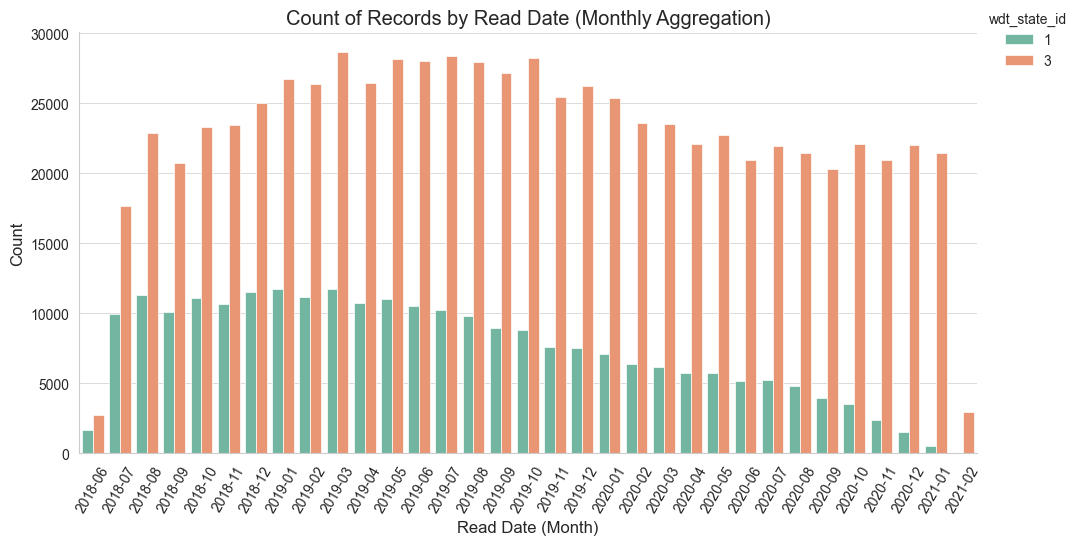

In [91]:

sns.set_style('whitegrid')  # Set style for the plot
graph = sns.catplot(x="read_date_month", data=df, hue="wdt_state_id", aspect=2, kind="count", palette="Set2")
graph.set_xticklabels(rotation=60)
plt.title("Count of Records by Read Date (Monthly Aggregation)")
plt.xlabel("Read Date (Month)")
plt.ylabel("Count")
sns.move_legend(graph, "upper right")
plt.show()

### From above plot we can interpret that the period January 2019 to January 2020 recorded over 25000 sensor values everry month.
### So let's analyze one month out of this time period

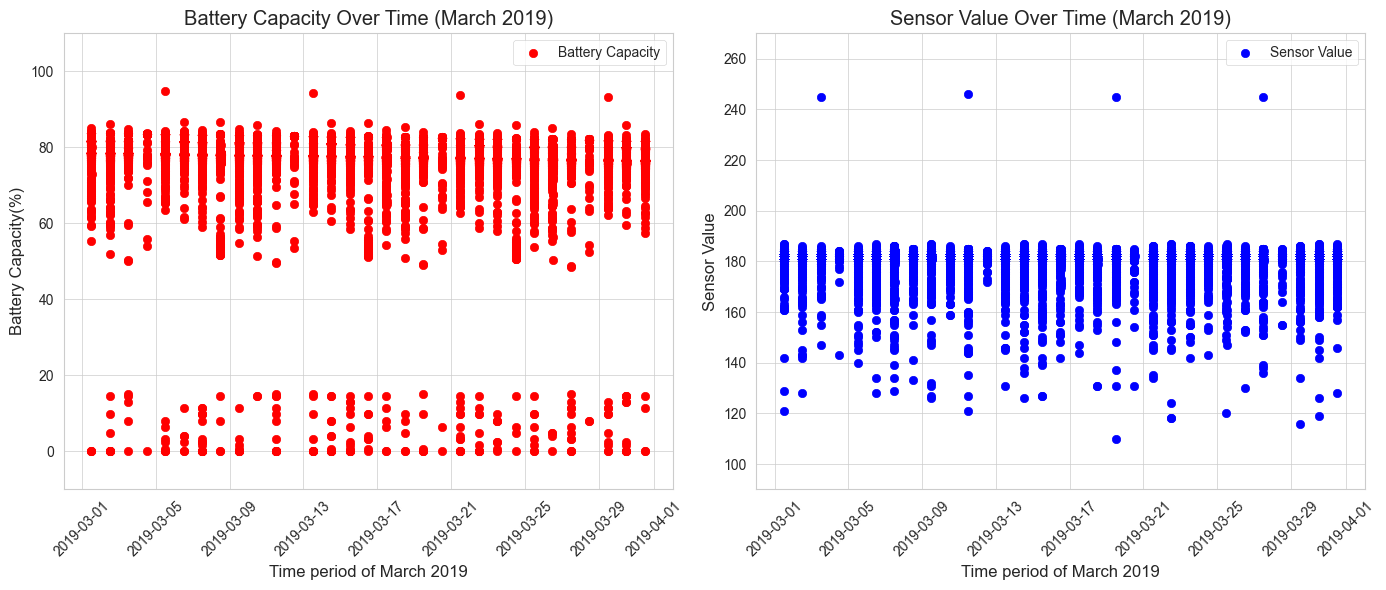

In [107]:
# Ensuring 'read_date' is datetime and extracting the month of March 2019
march_2019_data = df[df['read_date'].dt.to_period('M') == '2019-03']

# Sorting values by read_date
march_2019_data = march_2019_data.sort_values(by='read_date')

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First subplot for Battery Capacity
axes[0].scatter(march_2019_data['read_date'], march_2019_data['battery_capacity'], label='Battery Capacity', color='red')
axes[0].set_title('Battery Capacity Over Time (March 2019)')
axes[0].set_xlabel('Time period of March 2019')
axes[0].set_ylabel('Battery Capacity(%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(-10, 110) 
axes[0].grid(True)
axes[0].legend()

# Second subplot for Sensor Value
axes[1].scatter(march_2019_data['read_date'], march_2019_data['sensor_value'], label='Sensor Value', color='blue')
axes[1].set_title('Sensor Value Over Time (March 2019)')
axes[1].set_xlabel('Time period of March 2019')
axes[1].set_ylabel('Sensor Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(90, 270) 
axes[1].grid(True)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


## Let's find out the sensor values for the highest and least number of times a factory _id appears in our dataset

In [48]:
# Filter data for factory_id 72550335
filtered_df = df[df['factory_id'] == 72550335]
filtered_df_least = df[df['factory_id'] == 72634633]

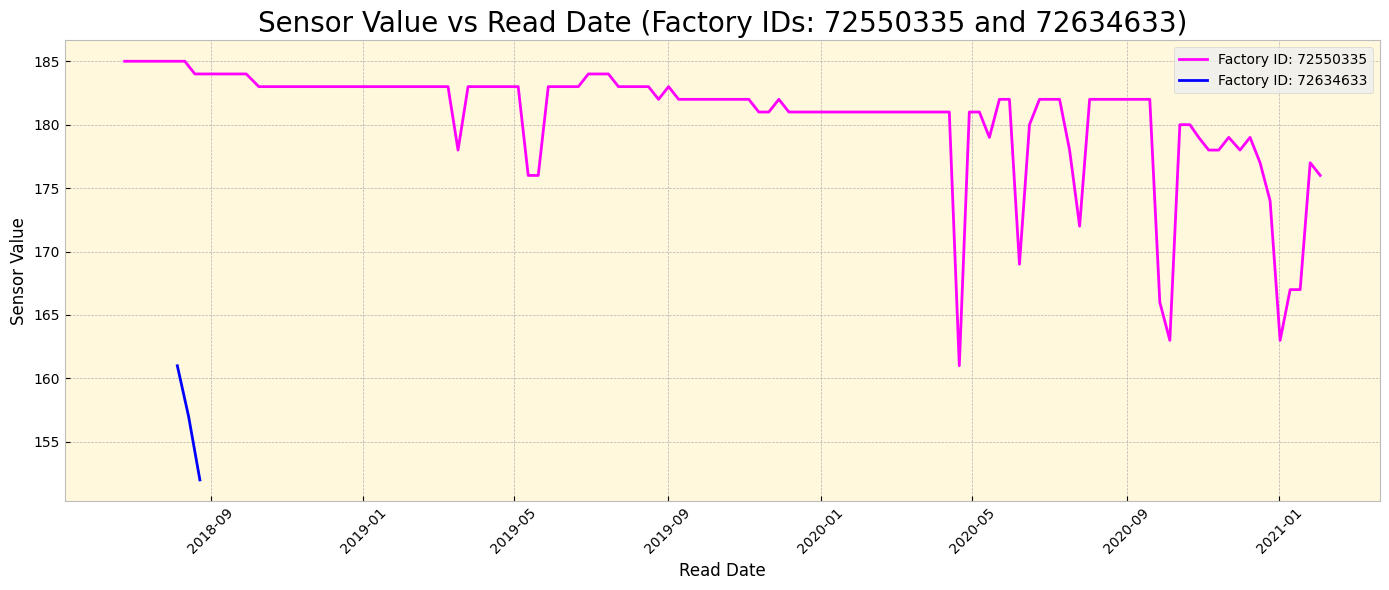

In [57]:
factory_high = filtered_df[filtered_df['factory_id'] == 72550335]
factory_least = filtered_df_least[filtered_df_least['factory_id'] == 72634633]
# Plot sensor values for both factory IDs in one plot
plt.figure(figsize=(14, 6))

# Plot for (highest) Factory ID: 72550335
plt.plot(factory_high['read_date'], factory_high['sensor_value'], label='Factory ID: 72550335', color='magenta')

# Plot for (least) Factory ID: 72634633
plt.plot(factory_least['read_date'], factory_least['sensor_value'], label='Factory ID: 72634633', color='b')

plt.title('Sensor Value vs Read Date (Factory IDs: 72550335 and 72634633)', fontsize=20)
plt.xlabel('Read Date')
plt.ylabel('Sensor Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().set_facecolor('cornsilk')
plt.tight_layout()
plt.show()


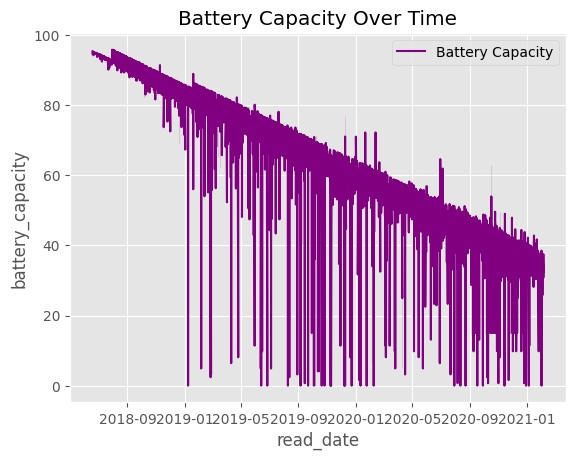

In [86]:
sns.lineplot(data=data_sample, x='read_date', y='battery_capacity', label="Battery Capacity", color='purple')
plt.title("Battery Capacity Over Time")
plt.show()


C:\Users\karti\AppData\Local\Temp\ipykernel_26068\3998617357.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data_sample.resample('M', on='read_date').mean()


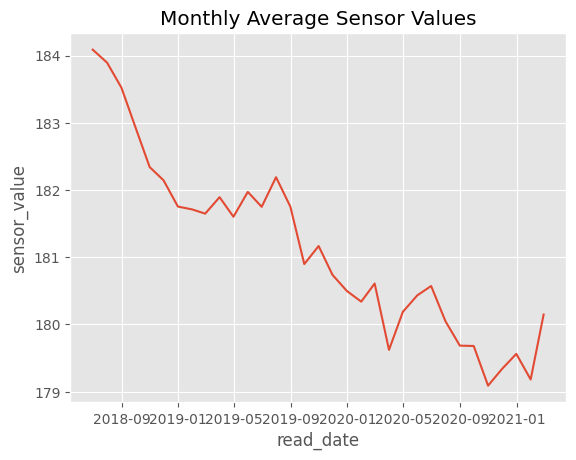

In [88]:
monthly_avg = data_sample.resample('M', on='read_date').mean()
sns.lineplot(data=monthly_avg, x=monthly_avg.index, y='sensor_value')
plt.title("Monthly Average Sensor Values")
plt.show()
